## Observations and Insights 

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [150]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice


249

In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()



In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,0
0,g989


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [157]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice
                                

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combine_pd.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

data = {
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": sem
}

summary_table = pd.DataFrame(data)
summary_table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_group_by = cleaned_df.groupby('Drug Regimen')
summary_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_2



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

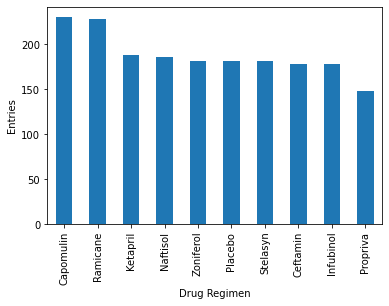

In [160]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = cleaned_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Entries")
plt.show()


Text(0, 0.5, 'Data Points')

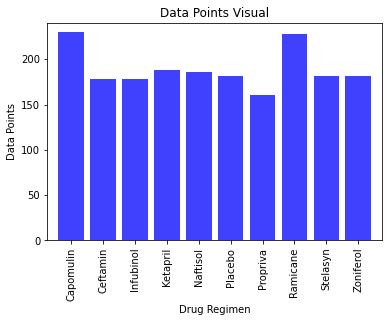

In [161]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(counts))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

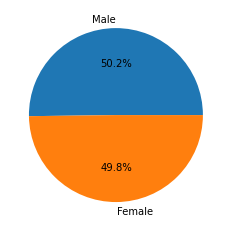

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_metadata.Sex.value_counts()
plt.pie(counts.values,labels=["Male", "Female"],autopct='%1.1f%%')
plt.show()


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

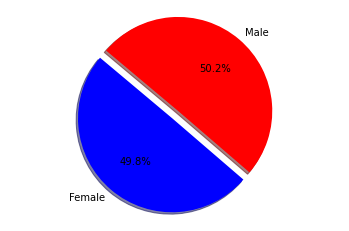

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]


sizes = [49.799197,50.200803]


colors = ['blue', 'red']


explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
by_mouse = combine_pd.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(combine_pd,on=['Mouse ID','Timepoint'],how="left")

merged_data
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")


    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


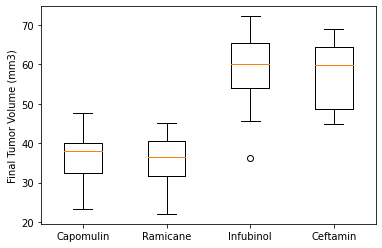

In [166]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

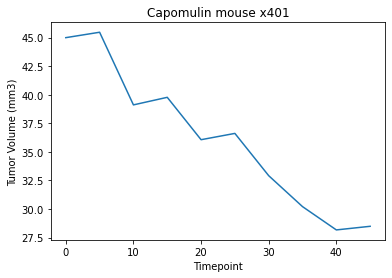

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
def get_line_plot(regimen, mouse_id):
    regimen_data = combine_pd.loc[combine_pd["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " mouse " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "x401")

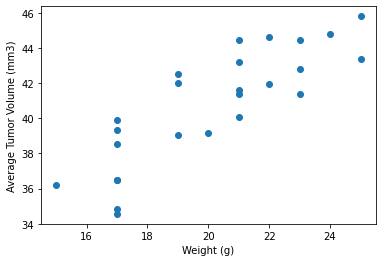

In [168]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
def generate_scatter_plot(regimen):
    regimen_data = combine_pd.loc[combine_pd['Drug Regimen'] == regimen]
    averages = regimen_data.groupby(['Mouse ID']).mean()
    plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.show()
    return averages
cap_mean = generate_scatter_plot("Capomulin")

## Correlation and Regression

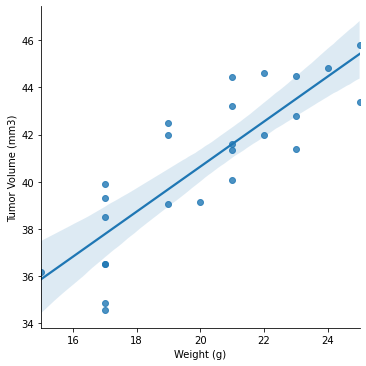

In [169]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coefficient = sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)', data=cap_mean, fit_reg=True)
plt.show()